In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
end = dt.datetime.now()
start = dt.date(end.year - 5, end.month,end.day)
Input = ['MSFT', '^GSPC']

In [3]:
df = reader.get_data_yahoo(Input,start,end)['Adj Close']

In [4]:
mtl_ret = df.resample('M').ffill().pct_change()
mtl_ret = mtl_ret.dropna(axis=0)
mtl_ret.head()

Symbols,MSFT,^GSPC
Date,,
2016-12-31,0.031198,0.018201
2017-01-31,0.040393,0.017884
2017-02-28,-0.004364,0.037198
2017-03-31,0.029384,-0.000389
2017-04-30,0.039477,0.009091


In [5]:
X = mtl_ret['^GSPC']
y = mtl_ret['MSFT']

X_sm = sm.add_constant(X)

In [6]:
model = sm.OLS(y, X_sm)

In [7]:
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     68.23
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.25e-11
Time:                        14:49:01   Log-Likelihood:                 115.67
No. Observations:                  60   AIC:                            -227.3
Df Residuals:                      58   BIC:                            -223.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0195      0.005      4.038      0.000       0.010       0.029
^GSPC          0.8716      0.106      8.260      0.000       0.660       1.083
==============================================================================
Omnibus:                        2.767   Durbin-Watson:                   2.567
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.330
Skew:                           0.483   Prob(JB):                        0.312
Kurtosis:                       3.003   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import seaborn as sns

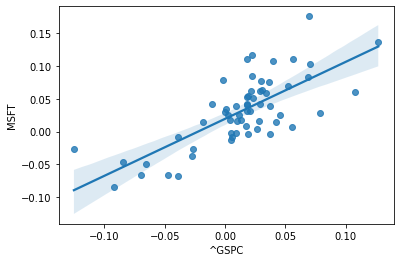

In [10]:
sns.regplot(x='^GSPC',y='MSFT',data=mtl_ret)
plt.show()